Project 2!
Emma Brown, Katie Lark, Jocelyn Rosa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import geopandas as gpd
import shapely
import skmob
from skmob.measures.individual import jump_lengths
from skmob.tessellation import tilers
from skmob.preprocessing import detection, clustering
from skmob.preprocessing import filtering


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.simplefilter("ignore")
import os

In [2]:
os.chdir('/Users/katielark/Downloads/')
scooters = pd.read_csv("scooters.csv",sep=',')

In [3]:
scooters = scooters.rename(columns={
    'Trip ID': 'trip_id',
    'Start Time': 'start_time',
    'End Time': 'end_time',
    'Trip Distance': 'trip_distance',
    'Trip Duration': 'trip_duration',
    'Start Community Area Name': 'start_neighborhood',
    'End Community Area Name': 'end_neighborhood',
    'Start Centroid Latitude': 'start_latitude',
    'Start Centroid Longitude': 'start_longitude',
    'Start Centroid Location': 'start_location',
    'End Centroid Latitude': 'end_latitude',
    'End Centroid Longitude': 'end_longitude',
    'End Centroid Location': 'end_location'
})
#changing column names because they are a pain

In [4]:
scooters['start_time'] = pd.to_datetime(scooters['start_time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
scooters['end_time'] = pd.to_datetime(scooters['end_time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
#converting start and end time to datetime

In [5]:
scooters.isna().sum()
#checking for na values in dataframe

trip_id                             0
start_time                          0
end_time                            0
trip_distance                       0
trip_duration                       0
Accuracy                            0
Start Census Tract             328202
End Census Tract               328364
Start Community Area Number     97389
End Community Area Number       97916
start_neighborhood              97389
end_neighborhood                97916
start_latitude                  97388
start_longitude                 97388
start_location                  97388
end_latitude                    97916
end_longitude                   97916
end_location                    97916
dtype: int64

In [6]:
scooters = scooters.dropna(subset=['start_time', 'end_time', 'start_neighborhood', 'end_neighborhood'])
#eliminating na values from relevant columns in dataframe

In [7]:
scooters['start_neighborhood'].unique()
#observing start locations listed in dataframe

array(['HERMOSA', 'PORTAGE PARK', 'EAST GARFIELD PARK', 'LOGAN SQUARE',
       'BELMONT CRAGIN', 'IRVING PARK', 'NEAR WEST SIDE', 'AUSTIN',
       'HUMBOLDT PARK', 'WEST TOWN', 'AVONDALE', 'MONTCLARE',
       'LOWER WEST SIDE', 'DUNNING', 'NORTH LAWNDALE',
       'WEST GARFIELD PARK', 'SOUTH LAWNDALE', 'BRIDGEPORT',
       'NEAR NORTH SIDE', 'NORTH CENTER', 'LINCOLN PARK', 'NEW CITY',
       'LOOP', 'GAGE PARK', 'NEAR SOUTH SIDE', 'WOODLAWN',
       'BRIGHTON PARK', 'UPTOWN', 'ARMOUR SQUARE'], dtype=object)

In [8]:
from shapely.geometry import Point
geometry = [Point(lon, lat) for lon, lat in zip(scooters['start_longitude'], scooters['start_latitude'])]
gdf_scooters = gpd.GeoDataFrame(scooters, geometry=geometry)
gdf_scooters.set_crs(epsg=4326, inplace=True)
#crafting geodataframe, with start locations as geometry column

,trip_id,start_time,end_time,trip_distance,trip_duration,Accuracy,Start Census Tract,End Census Tract,Start Community Area Number,End Community Area Number,start_neighborhood,end_neighborhood,start_latitude,start_longitude,start_location,end_latitude,end_longitude,end_location,geometry
10291,0dd95046-1bc8-4464-ba39-7f9e92c668b3,2019-08-06 18:00:00,2019-08-06 18:00:00,1004,236,152,1.703120e+10,1.703120e+10,20.0,20.0,HERMOSA,HERMOSA,41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),POINT (-87.73760 41.93505)
10293,6819df6a-9623-4ae0-b1d3-ec617197d229,2019-07-08 16:00:00,2019-07-08 17:00:00,9124,3182,10,1.703115e+10,1.703119e+10,15.0,19.0,PORTAGE PARK,BELMONT CRAGIN,41.949592,-87.761958,POINT (-87.7619580301513 41.9495915671753),41.920143,-87.760827,POINT (-87.7608269556143 41.920143229102),POINT (-87.76196 41.94959)
10342,aa71bb53-3e7f-4964-b6e6-030800419346,2019-08-10 21:00:00,2019-08-10 21:00:00,502,97,152,1.703184e+10,1.703184e+10,27.0,27.0,EAST GARFIELD PARK,EAST GARFIELD PARK,41.885045,-87.713862,POINT (-87.71386248059811 41.8850448415253),41.885045,-87.713862,POINT (-87.71386248059811 41.8850448415253),POINT (-87.71386 41.88504)
10367,5d256770-1a8a-5e20-8f78-316d1819f46b,2019-06-25 19:00:00,2019-06-25 20:00:00,5053,2167,0,1.703122e+10,1.703119e+10,22.0,19.0,LOGAN SQUARE,BELMONT CRAGIN,41.921126,-87.699754,POINT (-87.6997540616386 41.9211256768265),41.927819,-87.751362,POINT (-87.7513623675995 41.9278186319205),POINT (-87.69975 41.92113)
10369,dffe5324-5f6f-48e7-9edf-d51876ba7d2f,2019-09-19 08:00:00,2019-09-19 08:00:00,790,111,152,1.703119e+10,1.703120e+10,19.0,20.0,BELMONT CRAGIN,HERMOSA,41.935218,-87.744389,POINT (-87.7443888733072 41.9352176386575),41.927852,-87.735628,POINT (-87.7356282729632 41.9278522690551),POINT (-87.74439 41.93522)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710834,536f855f-2530-4c07-b93e-4de52e75cf1b,2019-09-06 07:00:00,2019-09-06 07:00:00,2524,500,10,NaN,NaN,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),POINT (-87.76550 41.92726)
710835,88721836-1a6c-4ae6-b320-8e9ce1861d16,2019-07-11 11:00:00,2019-07-11 11:00:00,2475,480,10,NaN,NaN,20.0,19.0,HERMOSA,BELMONT CRAGIN,41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),POINT (-87.73474 41.92435)
710836,3f930717-06cf-499d-b390-a45282851347,2019-09-17 17:00:00,2019-09-17 17:00:00,2228,590,10,NaN,NaN,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),POINT (-87.76550 41.92726)
710837,11d01331-0a12-607e-11d0-13310a12607e,2019-06-21 17:00:00,2019-06-21 17:00:00,1303,1088,10,NaN,NaN,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),POINT (-87.76550 41.92726)


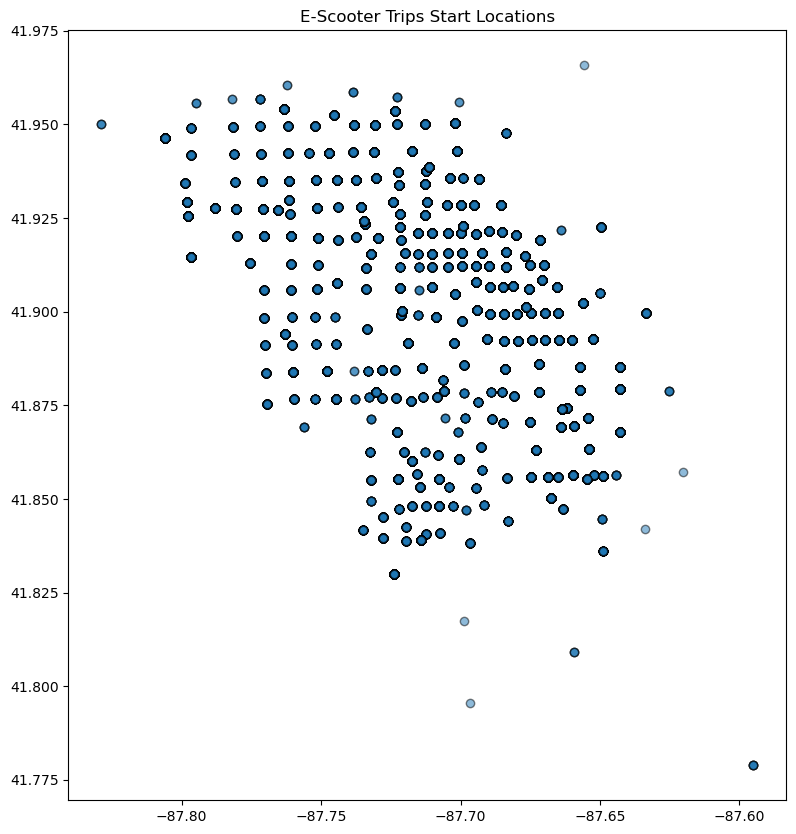

In [9]:
gdf_scooters.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
plt.title('E-Scooter Trips Start Locations')
plt.show()
#plotting start locations- can see shape of Chicago! 

In [10]:
hermosa = scooters[scooters["start_neighborhood"] == 'HERMOSA']
#beginning case study of hermosa (a place I would like to live in Chicago)!

In [11]:
hermosa['end_neighborhood'].unique()
#seeing the unique end locations for trips originating in hermosa

array(['HERMOSA', 'EAST GARFIELD PARK', 'DUNNING', 'HUMBOLDT PARK',
       'LOGAN SQUARE', 'IRVING PARK', 'LINCOLN PARK', 'JEFFERSON PARK',
       'LOWER WEST SIDE', 'MONTCLARE', 'NEAR WEST SIDE', 'PORTAGE PARK',
       'NORTH CENTER', 'NORTH LAWNDALE', 'SOUTH LAWNDALE',
       'WEST GARFIELD PARK', 'WEST TOWN', 'AUSTIN', 'ALBANY PARK',
       'AVONDALE', 'BELMONT CRAGIN'], dtype=object)

In [12]:
geometry = [Point(lon, lat) for lon, lat in zip(hermosa['end_longitude'], hermosa['end_latitude'])]
gdf_hermosa = gpd.GeoDataFrame(hermosa, geometry=geometry)
gdf_hermosa.set_crs(epsg=4326, inplace=True)
#creating geodataframe using end locations as geometry column
#Jocelyn introduced us to crs! 

,trip_id,start_time,end_time,trip_distance,trip_duration,Accuracy,Start Census Tract,End Census Tract,Start Community Area Number,End Community Area Number,start_neighborhood,end_neighborhood,start_latitude,start_longitude,start_location,end_latitude,end_longitude,end_location,geometry
10291,0dd95046-1bc8-4464-ba39-7f9e92c668b3,2019-08-06 18:00:00,2019-08-06 18:00:00,1004,236,152,1.703120e+10,1.703120e+10,20.0,20.0,HERMOSA,HERMOSA,41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),POINT (-87.73760 41.93505)
10370,5e7880e5-feac-41f4-8bab-9a7b8f630c8e,2019-06-17 16:00:00,2019-06-17 16:00:00,690,375,152,1.703120e+10,1.703120e+10,20.0,20.0,HERMOSA,HERMOSA,41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),41.935048,-87.737604,POINT (-87.7376041954734 41.9350481285613),POINT (-87.73760 41.93505)
10373,b55ae215-7be0-4bf1-87f6-9cc2aa8d0177,2019-09-18 06:00:00,2019-09-18 06:00:00,1200,191,152,NaN,NaN,20.0,20.0,HERMOSA,HERMOSA,41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),POINT (-87.73474 41.92435)
10375,6577640a-db90-4660-862c-ef39d4df4571,2019-09-26 20:00:00,2019-09-26 20:00:00,3254,971,152,NaN,NaN,20.0,20.0,HERMOSA,HERMOSA,41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),POINT (-87.73474 41.92435)
10401,65834d46-e050-56ac-adb6-071b282c195f,2019-07-02 16:00:00,2019-07-02 16:00:00,1239,484,0,1.703120e+10,1.703120e+10,20.0,20.0,HERMOSA,HERMOSA,41.923481,-87.734126,POINT (-87.7341263763901 41.9234805419582),41.919828,-87.737542,POINT (-87.73754189629301 41.9198284843776),POINT (-87.73754 41.91983)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710784,b9ce6f9a-095d-4b0e-9e74-610b6cd8052c,2019-07-24 16:00:00,2019-07-24 17:00:00,698,178,152,NaN,NaN,20.0,19.0,HERMOSA,BELMONT CRAGIN,41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),POINT (-87.76550 41.92726)
710796,b20d4bf9-defd-5d80-8b40-c3eb0b72adf5,2019-08-05 12:00:00,2019-08-05 12:00:00,563,222,0,NaN,NaN,20.0,19.0,HERMOSA,BELMONT CRAGIN,41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),POINT (-87.76550 41.92726)
710800,50a0ea98-b913-4d3f-a6b3-f863f6430d87,2019-08-13 13:00:00,2019-08-13 13:00:00,1692,631,152,NaN,NaN,20.0,19.0,HERMOSA,BELMONT CRAGIN,41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),POINT (-87.76550 41.92726)
710831,f5d09075-c8ba-4e9b-9b07-6069fb2acee1,2019-07-09 21:00:00,2019-07-09 21:00:00,2107,346,152,1.703183e+10,1.703119e+10,20.0,19.0,HERMOSA,BELMONT CRAGIN,41.915319,-87.732250,POINT (-87.7322503417904 41.91531879687441),41.919230,-87.743801,POINT (-87.74380099982481 41.9192298066712),POINT (-87.74380 41.91923)


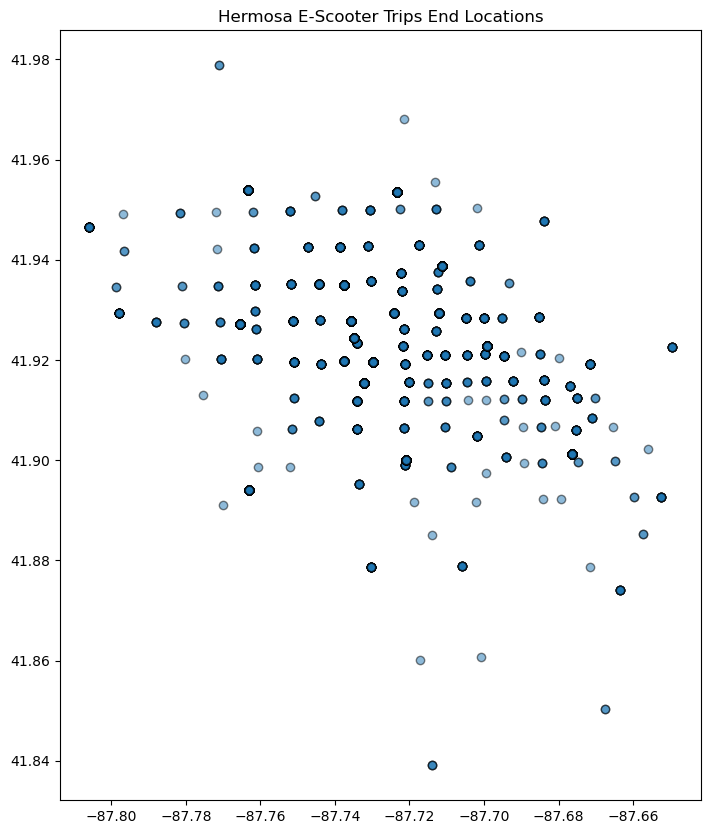

In [13]:
gdf_hermosa.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
plt.title('Hermosa E-Scooter Trips End Locations')
plt.show()
#plotting end locations of trips originating in hermosa

In [14]:
import math
def my_haversine(lat1, lon1, lat2, lon2):
    R = 6371e3 # in meters
    phi1 = lat1 * math.pi/180 # φ, λ in radians
    phi2 = lat2 * math.pi/180
    delta_phi = (lat2-lat1) * math.pi/180
    delta_lambda = (lon2-lon1) * math.pi/180
    a = math.sin(delta_phi/2) * math.sin(delta_phi/2) + \
        math.cos(phi1) * math.cos(phi2) * \
        math.sin(delta_lambda/2) * math.sin(delta_lambda/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a)) # atan2(x,y) = arctan(x/y) if y > 0
    d = R * c # unit is in meters
    return d
#haversine equation from class!

In [15]:
def calculate_distance(row):
    lat1 = (row['start_latitude'])
    lon1 = (row['start_longitude'])
    lat2 = (row['end_latitude'])
    lon2 = (row['end_longitude'])
    return my_haversine(lat1, lon1, lat2, lon2)
#consulted chatgpt to understand the (row) code

In [16]:
hermosa['distance_km'] = hermosa.apply(calculate_distance, axis=1)
#created distance column containing distances between start and end centroids

In [17]:
(hermosa['distance_km']<0.0001).sum()
#investigating number of round trips! 

4774

In [18]:
start_hermosa = [Point(lon, lat) for lon, lat in zip(hermosa['start_longitude'], hermosa['start_latitude'])]
end_hermosa = [Point(lon, lat) for lon, lat in zip(hermosa['end_longitude'], hermosa['end_latitude'])]

gdf_start_hermosa = gpd.GeoDataFrame(hermosa[['start_latitude', 'start_longitude']], geometry=start_hermosa)
gdf_end_hermosa = gpd.GeoDataFrame(hermosa[['end_latitude', 'end_longitude']], geometry=end_hermosa)

gdf_start_hermosa.set_crs(epsg=4326, inplace=True)
gdf_end_hermosa.set_crs(epsg=4326, inplace=True)
#creating geodataframes of start and end centroids (geometry columns are start and end respectively)

,end_latitude,end_longitude,geometry
10291,41.935048,-87.737604,POINT (-87.73760 41.93505)
10370,41.935048,-87.737604,POINT (-87.73760 41.93505)
10373,41.924348,-87.734740,POINT (-87.73474 41.92435)
10375,41.924348,-87.734740,POINT (-87.73474 41.92435)
10401,41.919828,-87.737542,POINT (-87.73754 41.91983)
...,...,...,...
710784,41.927261,-87.765502,POINT (-87.76550 41.92726)
710796,41.927261,-87.765502,POINT (-87.76550 41.92726)
710800,41.927261,-87.765502,POINT (-87.76550 41.92726)
710831,41.919230,-87.743801,POINT (-87.74380 41.91923)


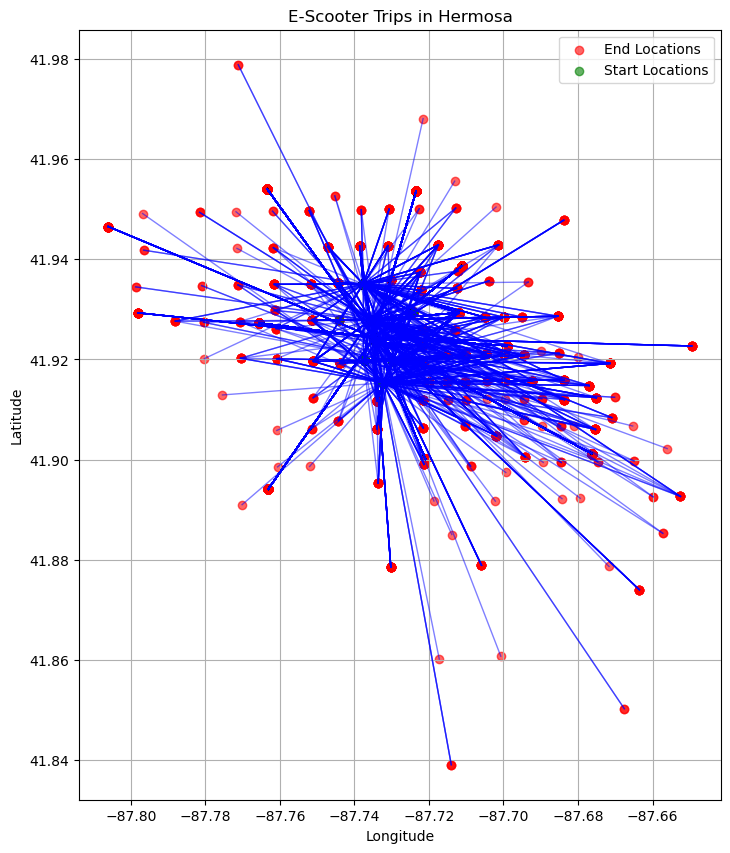

In [19]:
plt.figure(figsize=(10, 10))
gdf_end_hermosa.plot(ax=plt.gca(), color='red', marker='o', label='End Locations', alpha=0.6)
gdf_start_hermosa.plot(ax=plt.gca(), color='green', marker='o', label='Start Locations', alpha=0.6)
for _, row in hermosa.iterrows():
    start_point = (row['start_longitude'], row['start_latitude'])
    end_point = (row['end_longitude'], row['end_latitude'])
    plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], color='blue', alpha=0.5, linewidth=1)

plt.title('E-Scooter Trips in Hermosa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()
#plotting start and end centroids as well as trajectories between them. 
#consulted chatgpt for elements of this code (iterrows())

In [20]:
# Count frequency of each start-end pair
hermosa['start_end'] = list(zip(hermosa['start_latitude'], hermosa['start_longitude'], 
                                  hermosa['end_latitude'], hermosa['end_longitude']))
frequency = hermosa['start_end'].value_counts().reset_index()
frequency.columns = ['start_end', 'count']

frequency[['start_lat', 'start_lon', 'end_lat', 'end_lon']] = pd.DataFrame(frequency['start_end'].tolist(), index=frequency.index)
#consulted chatgpt to devise a way to demonstrate frequency of specific routes traveled

In [21]:
norm_counts = frequency['count'] / frequency['count'].max()

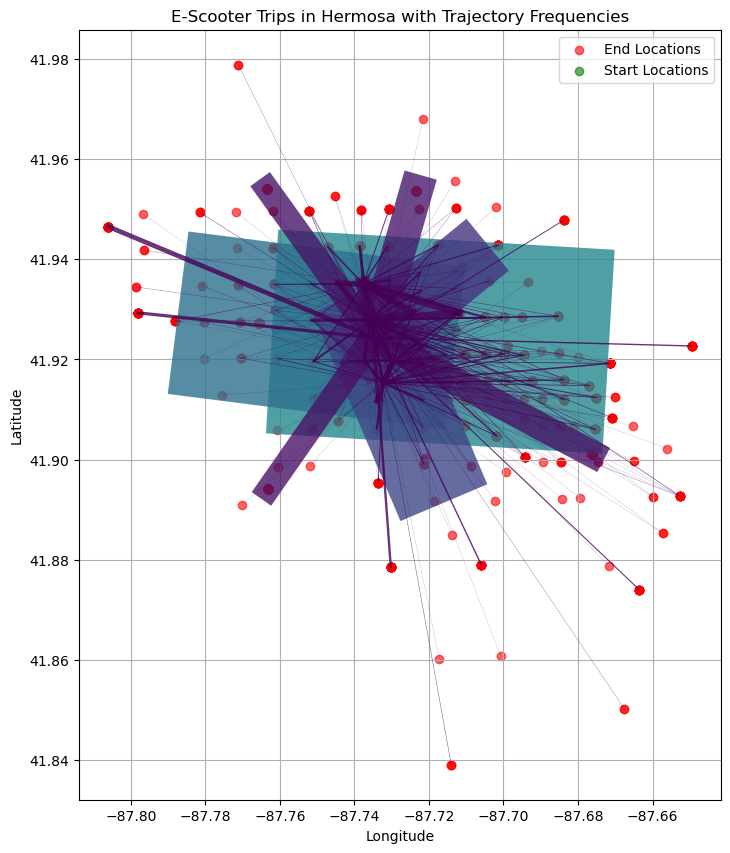

In [22]:
import matplotlib.cm as cm
plt.figure(figsize=(10, 10))

gdf_end_hermosa.plot(ax=plt.gca(), color='red', marker='o', label='End Locations', alpha=0.6)

gdf_start_hermosa.plot(ax=plt.gca(), color='green', marker='o', label='Start Locations', alpha=0.6)

for _, row in frequency.iterrows():
    start_point = (row['start_lon'], row['start_lat'])
    end_point = (row['end_lon'], row['end_lat'])
    
    # Use the normalized count to determine color
    color = cm.viridis(norm_counts.loc[frequency['start_end'] == row['start_end']].values[0])
    
    plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 
             color=color, alpha=0.8, linewidth=row['count'] * 0.1)

# Add labels and title
plt.title('E-Scooter Trips in Hermosa with Trajectory Frequencies')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()
#consulted chatgpt for a few elements of this code (color, linewidth)
#this graph is cool because it shows the most popular routes, as well as the typical range of the e-scooter trips

In [23]:
scooters['S Time'] = scooters['start_time'].dt.time 
#a google search helped me create a column that 'pulled out' just the time from the date time column

In [24]:
scooter_time = scooters[['start_neighborhood', 'S Time']] 
#made a dataframe of just the scooters "Start Community Name" and the "Start Time" to make it easier to work with

In [25]:
scooter_time['S Time'] = scooter_time['S Time'].astype(str) 
#used chatgpt to turn this column's type from date time to string so I could make the following comparison

In [26]:
scooter_morning = scooter_time[(scooter_time["S Time"] < "12:00:00")]
#created a dataframe of scooters whose use started in the mornings

In [27]:
scooter_evening = scooter_time[(scooter_time["S Time"] >= "12:00:00")]
#created a dataframe of scooters whose use started at or after noon

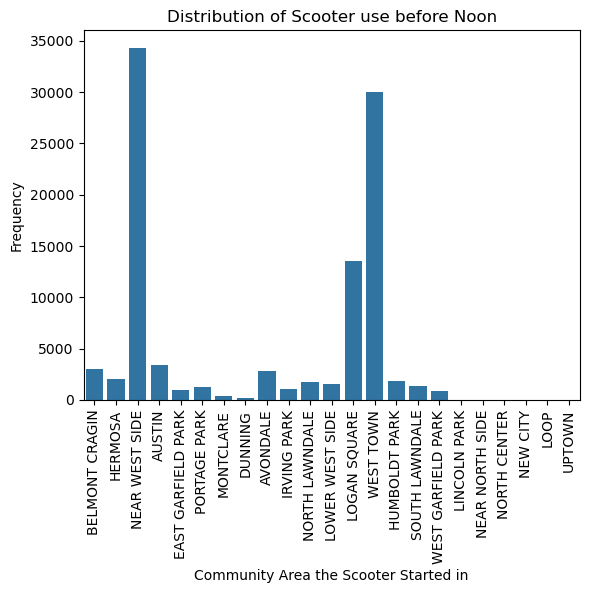

In [28]:
sns.countplot(x = scooter_morning['start_neighborhood'])
plt.title('Distribution of Scooter use before Noon')
plt.xlabel('Community Area the Scooter Started in')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()
#created a histogram to see what neighborhoods use scooters more in the mornings

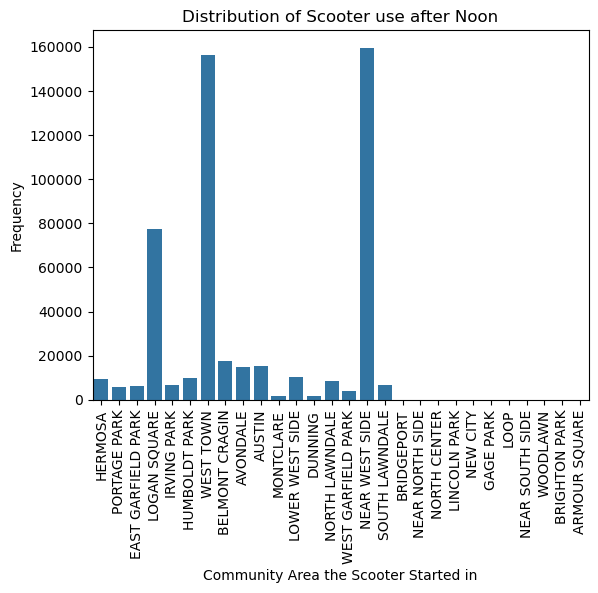

In [29]:
sns.countplot(x = scooter_evening['start_neighborhood'])
plt.title('Distribution of Scooter use after Noon')
plt.xlabel('Community Area the Scooter Started in')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()
#created a histogram to see which neighborhoods use scooters more in the afternoon and evening
#note that the y-axes are different scales (more scooters were used in the evenings than in the mornings overall)

In [30]:
import folium
from folium.plugins import HeatMap
from IPython.display import display, IFrame

# Prepare the data for the HeatMap by dropping any rows with NaN values
heatmap_data = scooters[['start_latitude', 'start_longitude']].dropna().values.tolist()

# Initialize the map centered around the mean location of the data points
m = folium.Map(location=[df['Start Centroid Latitude'].mean(), df['Start Centroid Longitude'].mean()], zoom_start=12)

# Add the heatmap layer to the map
HeatMap(data=heatmap_data, radius=15).add_to(m)

# Save the map as an HTML file (optional)
m.save('heatmap.html')

# Display the map inline in the Jupyter notebook
display(IFrame('heatmap.html', width=700, height=500))

#Jocelyn crafted this code. She was able to run it on her own device, and made a really cool heatmap!
#Let us know if the code does not run on your computer, and we can upload the heatmap to github. 

NameError: name 'df' is not defined